<a href="https://colab.research.google.com/github/crgraham/Twitter-data-times-series-eval/blob/main/Times_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction: Preliminaries

Fundamentals of time-series:
1. A time series is a series of data points indexed (or listed or graphed) in time order: {X_t: t=0,...,n}

2. Common types of time series data include:

<ul>
<li>Meteorology: temperatures (low/high), precipitation, wind speed</li>
<li>Agriculture: crop/livestock production, soil erosion, exports</li>
<li>Biology: heart beats, blood pressure, EEG (electroencephalography)</li> 
<li>Economics/finance: evolution of interest rates, stock prices, prices, sales</li>
<li>Spoken language data</li>
</ul>

3. Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.
• Time series forecasting is the use of a model to predict future values based on previously observed values
• Differs from other statistical techniques
- Observations are assumed to be dependent
- Goal: model dependence on time

Time series analysis entails:
1. **Analysis**

<ul>
<li>exploratory analysis</li>
<li>auto-correlation analysis</li>
<li>curve fitting (regression)</li>
<li>decomposition</li>
</ul>

2. **Forecasting**

<ul>
<li>AR, MA, ARIMA modeling</li>
</ul>

3. **Basic concepts:**

<ul>
<li>correlation: a statistical technique that can show whether and how strongly pairs of variables are related.</li>
<li>correlation coifficient: a stistical measure of the extent to which two factors vary together.</li>

> $cor(X,Y) =\frac{E[(X-\mu_x)(Y-\mu_y)]}{\sigma_x\sigma_y} = \frac{cov(X, Y)}{\sigma_x\sigma_y}$ 

 > ${X_t: t=0,...,n}, {Y_{t}: t=0,...,n}$

 <li>autocorrelation (AC): also know as serial correlation, is the correlation of a signal with a delayed copy of itself as a function of the delay. AC is a very important concept in time series analyis: (1) used to analyse the autocorrelation function before regression analysis and (2) to uncover hidden pattern in data - such as identifying seasonality (defined below)</li>

> $R_τ(X)=\frac{E[(X_t - μ)(X_t+τ - μ)]}{σ^2}$

> τ is the delay lag.

<li>stationarity: the statistical properties of a process (i.e., mean, variance and covariance of the i th term and the i + m term should not be a function of time. This does not mean times series does not change over time, only that it assues changes happen in a predictable way. 
> Examples include Random, walk, Moving Average, Auto-Regressibe Integrated moving average (ARIMA). We can stationarise data through de-trending, differencing and logging. Please consult further resources for more on these concepts. We can use the Augmented Dickey Fuller test (ADF) to check if assumptions of stationarity are met or violated.</li>

<li> ADF: The null hypothesis is the time series possesses a unit root and is non-stationary. So, if the p-value in ADF test is less than the significance level (0.05), we reject the null hypothesis.</li>

<li>seasonality: repetitive and predictable movement around the trend line. This is usually base don the season (month, year, etc.). We use the autocorrelation function (ACF) to identify stationarity. </li>
</ul>
 
**Further resources**:

A more thorough introduction can be found in: 

Forecasting: Principles and Practice. R. J. Hyndman and G. Athanasopoulos. (https://otexts.com/fpp2/) 

Introduction to the Science of Statistics. Joseph C. Watkins. ( https://www.math.arizona.edu/~jwatkins/statbook.pdf) 





# 2. Aims of the study

In this study I will perform a time-series analysis of tweet data. My specific aims are:

<ol>
<li>to decompose the data into trend, seasonal component, and remainder.</li>

<li>to implement the auto-correlation function (ACF) to determine if the remainder is uncorrelated.</li>

<li>to determine whether the trend data is a stochastic (i.e., stationary). To do this, I will rely on two tests: (1) the auto-correlation of the differenced trend and (2) the scatter plot of the time-series against a 1-lagged version of itself.</li>

<li>to evaluate the quality of the model by examining the randomness of the remainder. A good model of the trend should lead to a remainder that is close to a Normal random variable. There are multiple ways of checking the remainder, e.g., explicitly modelling its probability distribution, looking
at its correlation structure, or using hypothesis tests. In this experiment I use a statistical test, the ADF test to test the quality of the model.</li>
</ol>

**Reminder**: This data is a time-series of the number of tweets per second. The first column is the time(in seconds) and the second column is the number of tweets observed during this second

In [2]:
#import packages
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

#import data
data =pd.read_csv("http://www.eecs.qmul.ac.uk/~linwang/download/ecs764//tweet-time-series", header=None, sep=" ")

#Here I sub-select 70000:269999
data = data.iloc[70000:270000, 1] 

# 3. Time-series analysis




##3.1 Decomposition

Here I decompose the sequence into trend, seasonal component, and remainder.

In [ ]:
result = seasonal_decompose(data, model="additive", freq=100) 
trend = result.trend
seasonal = result.seasonal
remainder = result.resid
#explore the decomposition
print(trend)
#trend
print(seasonal)
#seasonal
print(remainder)
#residual

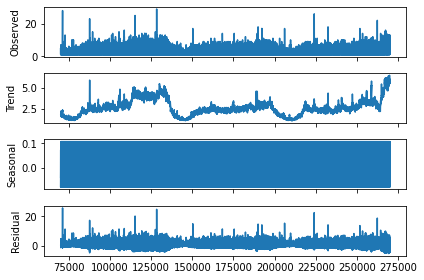

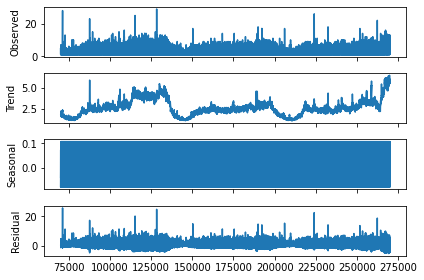

In [4]:
#Here I plot the results of the decomposition
result.plot()

**Question 1**: What does the decompostition reveal about the time series, i.e, how can it best be described?

**Answer**: Based on the decomposition of the time-series, the model that best describes the times series is a trend plus random noise.

##3.2. Correlation analysis
The decomposition of the time-series provided should provide a “remainder” component that should be uncorrelated, i.e., close to random noise. Here I examine whether this is the case based on the autocorrelation
function (plot_acf())

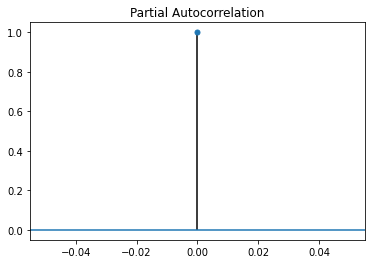

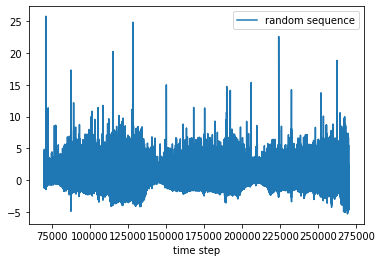

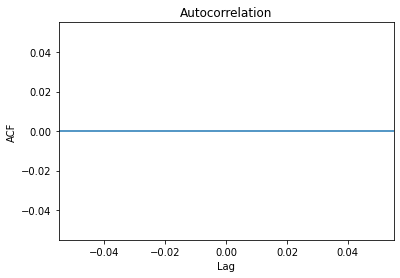

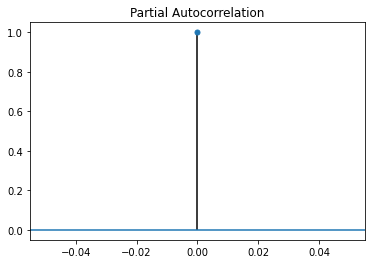

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
result = seasonal_decompose(data, model="additive", freq=100) 

# x is the remainder
x = result.resid
x = remainder
plt.figure()
plt.plot(x,label='random sequence')
plt.xlabel('time step')
plt.legend()
plot_acf(x)
plt.xlabel('Lag')
plt.ylabel('ACF')
plot_pacf(x)





**Question**: Does the auto-correlation function indicate that the remainder is indeed uncorrelated?

**ANSWER**:The ACF plot here shows that they are indeed uncorrelated, with the values of the ACF being close to 0. This confirms that it is close to random noise.

##3.3. Stationarity analysis

This section examines whether the trend of the data is a stochastic process. We address this question using the scatter plot of the time-series against a 1-
lagged version of it. An alternative way would be to examine the ACF of the differenced trend, but we do not implement this here.

###3.3.1. Scatter plot method

Note: 
>The data is already decomposed and stored in variable 'trend'

>We will need to create a lagged dataset

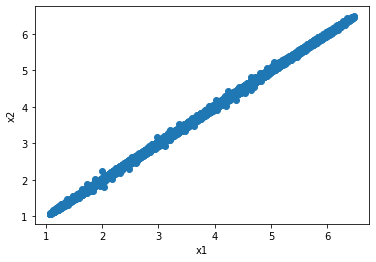

In [6]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st

#name trend data1 - 'data' is already taken.
data1 = trend

#I create 1-lag using <.shift>
data2 = data1.shift(1)

plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(data1, data2)
plt.show()



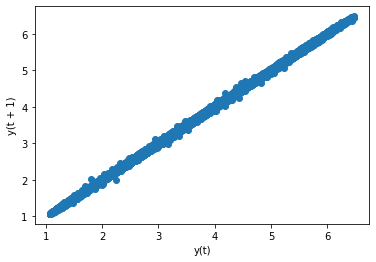

In [ ]:
'''Q4.3: Is the trend of the data a stochastic process? Justify your answer by relying either on (1) the
auto-correlation of the differenced trend, or (2) on the scatter plot of the time-series against a 1-
lagged version of it.'''
#An alternative way to implement the 1-lag, which I've experiemted with.

import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import scipy
import scipy.stats as st
series = trend
lag_plot(series)
pyplot.show()





**Question**: Is the trend of the data a stochastic process?

**Answer**: The 1-lagged scatterplot of the trend data is basically diagonal, which suggests that it is not stochastic/stationary.



#3.4. Evalution of model quality

One way of judging the quality of a model is through the randomness of the remainder. A good model of the trend should lead to a remainder that is close to a Normal random variable. There are multiple ways of checking the remainder, e.g., explicitly modelling its probability distribution, looking
at its correlation structure, or using hypothesis tests. In this study we use an ADF test to evaluate the model.

In [8]:
x = remainder
x1 = x.dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(x1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
p0 = result[1]


ADF Statistic: -81.529688
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Question**: Is the remainder of stationary or does it change as a function of time? 

**Answer**: The result of the ADF test confirms that the remainder is stationary (as seen in the significantly low p-value). This confirms (what we also saw from the analysis of of the autocorrelation function in 3.2) that remainder is uncorrelated. This is what we would expect because after decomposition where information was extracted to compute the trend/forecast. If it were non-atinary it would mean that there is still useful information remaning and the decomposition process is not complere. From this I conclude that the remainder is essentially close to a random process.

